# Figures pour le papier Digital Twins

In [4]:
from snake_ai.envs import RandomObstaclesEnv
import scipy.sparse as sp
import numpy as np
import phi.flow as pf
import matplotlib.pyplot as plt

## Définition des différences finies

In [ ]:
def create_laplacian_matrix_2d(
    nx: int, ny: int, dx: float, dy: float
) -> sp.lil_array:
    Dxx = sp.diags([1, -2, 1], [-1, 0, 1], shape=(nx, nx)) / dx**2
    Dyy = sp.diags([1, -2, 1], [-1, 0, 1], shape=(ny, ny)) / dy**2
    return sp.lil_array(sp.kronsum(Dyy, Dxx))


def create_laplacian_matrix_3d(
    nx: int, ny: int, nz: int, dx: float, dy: float, dz: float
) -> sp.lil_array:
    # Compute the 2D laplacian matrix
    laplace_2d = create_laplacian_matrix_2d(nx, ny, dx, dy)

    Dzz = sp.diags([1, -2, 1], [-1, 0, 1], shape=(nz, nz)) / dz**2
    return sp.lil_array(sp.kronsum(Dzz, laplace_2d))

## Utilisation d'environements existants

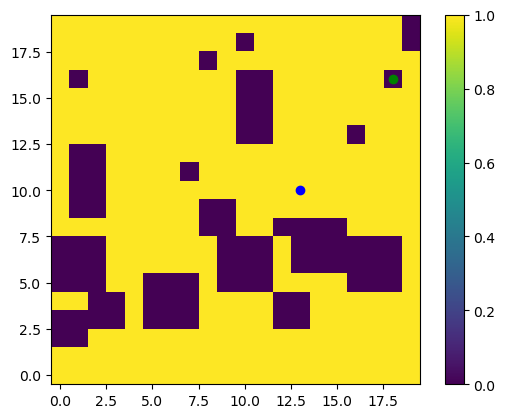

In [11]:
env = RandomObstaclesEnv(pixel=1, nb_obs=20, max_obs_size=3)
env.reset()
plt.imshow(env._free_position_mask, origin='lower')
plt.plot(env.goal.y, env.goal.x, 'go')
plt.plot(env.agent.position.y, env.agent.position.x, 'bo')
plt.colorbar()

In [12]:
bounds = pf.Box(x=env.width, y=env.height)
goal = pf.Box(x=(env.goal.left, env.goal.right), y=(env.goal.top, env.goal.bottom))
resolution = 2
boundary_conditions = pf.CenteredGrid(0, bounds=bounds, extrapolation=0, resolution=pf.spatial(x=env.width * resolution, y= env.height * resolution))


NameError: name 'phiflow' is not defined